# Customer Segmentation Using K-Means Clustering

## Introduction
Customer segmentation is a crucial aspect of marketing strategy, allowing businesses to tailor their approaches to different groups of customers. In this project, we will use the K-Means clustering algorithm to segment customers based on their purchasing behavior and other relevant features.


## Dataset Description
The dataset contains the following features:
- **CustomerID:** Unique identifier for each customer
- **Gender:** Gender of the customer
- **Age:** Age of the customer
- **Annual Income (k$):** Annual income of the customer in thousands of dollars
- **Spending Score (1-100):** Score assigned by the mall based on customer behavior and spending nature


You can download the dataset from [Kaggle's Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).

## Data Loading and Initial Exploration
First, we will load the dataset and perform an initial exploration to understand its structure and identify any missing or incorrectly formatted values.

In [2]:
import os
import pandas as pd

# Load the dataset
path = r"C:\Users\hassa\OneDrive\المستندات\Machine learning files\Mall customers segmentation\Mall_Customers.csv"
df = pd.read_csv(path)

# Display the first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

There are no missing values in the dataset, so we can proceed with data preprocessing.

## Data Cleaning and Preprocessing
We will handle any missing values and encode categorical features to prepare the data for clustering.

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical feature 'Gender'
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Check the first few rows of the dataset after encoding
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2


The 'Gender' column has been encoded, where 'Female' is represented as 0 and 'Male' as 1.

In [6]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


The features 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' have been scaled to have a mean of 0 and a standard deviation of 1.

## Exploratory Data Analysis (EDA)
We will perform exploratory data analysis to understand the distributions and relationships between features.


<IPython.core.display.Javascript object>


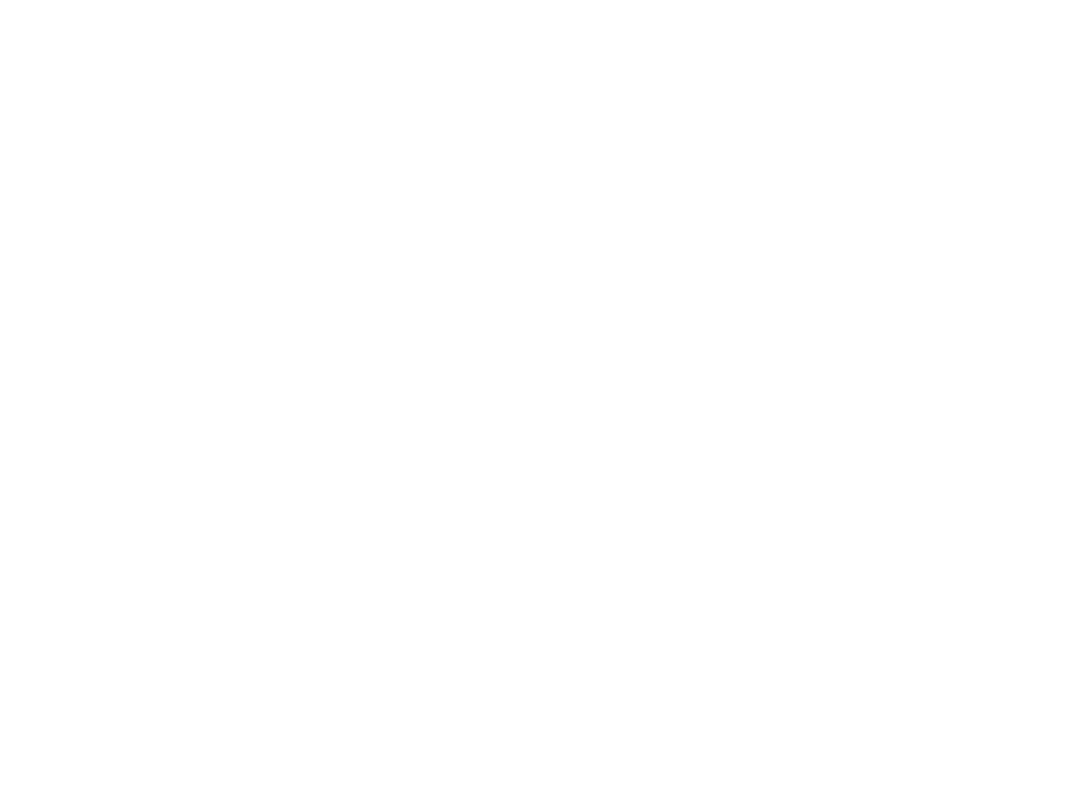

<IPython.core.display.Javascript object>


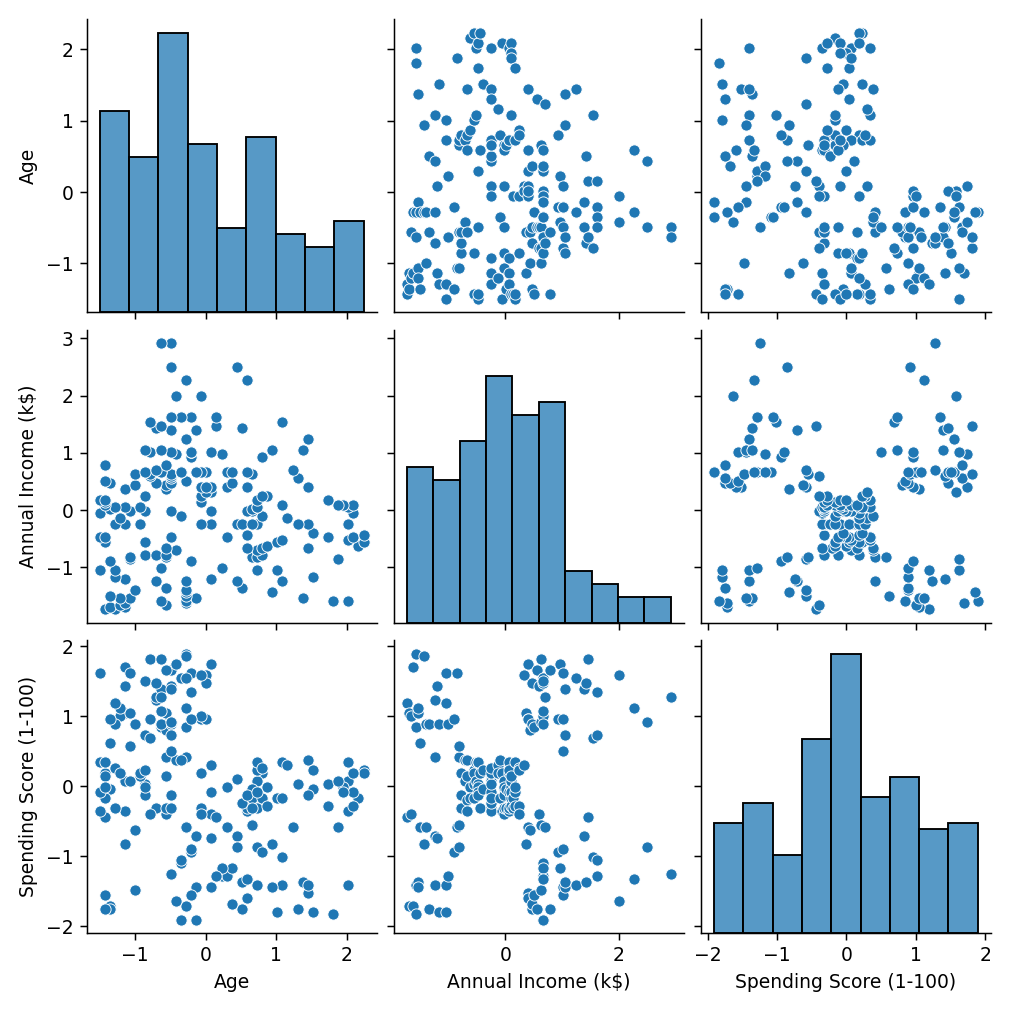

C:\Users\hassa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# Pairplot of the scaled features
plt.figure(figsize=(8,6))
sns.pairplot(scaled_df)
plt.show()
plt.savefig('pair', dpi = 300)

The pairplot shows the relationships between the scaled features. This helps us understand the distribution and potential clusters in the data.

<IPython.core.display.Javascript object>


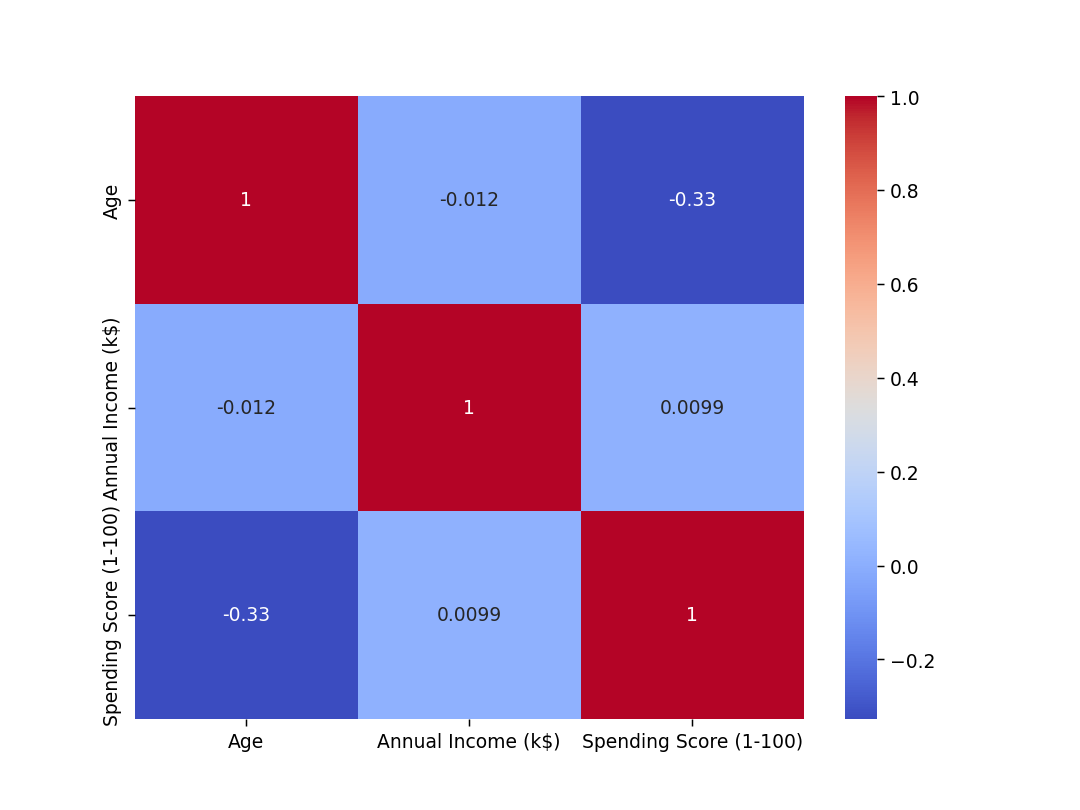

In [10]:
# Heatmap of the correlations
plt.clf
plt.figure(figsize=(8, 6))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm')
plt.show()
plt.savefig('heat_1', dpi = 300)

The heatmap shows the correlations between the scaled features. This helps us understand how the features are related to each other.

## Model Building and Evaluation
We will use the K-Means clustering algorithm to segment the customers and evaluate the model using the elbow method and silhouette score.

C:\Users\hassa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hassa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hassa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\hassa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

<IPython.core.display.Javascript object>


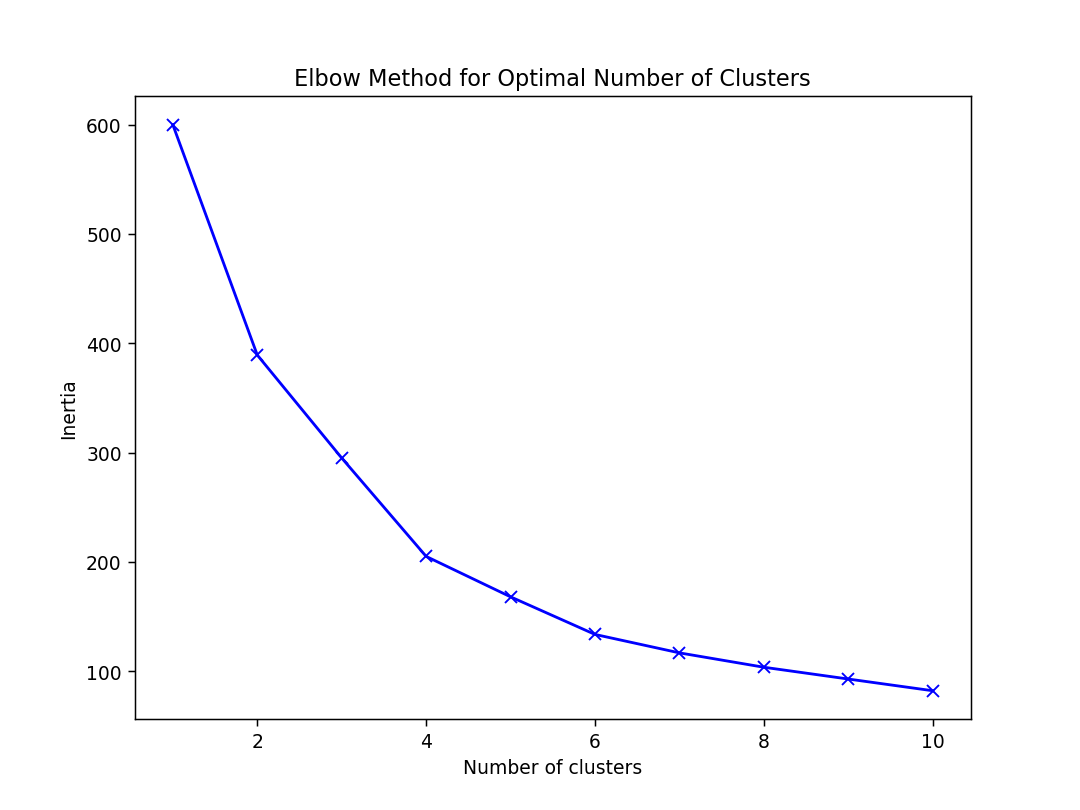

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.clf
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

The elbow curve helps us determine the optimal number of clusters. The point where the curve bends (the "elbow") indicates the optimal number of clusters.


In [17]:
# Choose the optimal number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_df)
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['Cluster'] = labels

# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_df, labels)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg:.2f}')

C:\Users\hassa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hassa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for 5 clusters: 0.42


## Conclusion and Next Steps
In this project, we successfully segmented customers using the K-Means clustering algorithm. The optimal number of clusters was determined using the elbow method, and the model was evaluated using the silhouette score. The resulting clusters provide insights into different customer segments, which can be used to tailor marketing strategies.

### Next Steps:
1. Perform further analysis on each customer segment to understand their characteristics.
2. Experiment with different clustering algorithms (e.g., DBSCAN, Hierarchical Clustering) to compare results.
3. Use additional features or external data to enhance the clustering model.
